In [61]:
import os
from os import path
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

import collections

import utils

# import logging as log
# log.basicConfig(level=log.DEBUG)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

import itertools

In [62]:
DATA_FOLDER = path.join('..', 'data')
RESULTS_FOLDER = path.join('..', 'results')

STATES = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE',
         'DF', 'ES', 'GO', 'MA', 'MT', 'MS',
         'MG', 'PA', 'PB', 'PR', 'PE', 'PI',
         'RJ', 'RN', 'RO', 'RS', 'RR', 'SC',
         'SE', 'SP', 'TO']

MODELS = ['linear-regression', 'gaussian-process', 'mlp', 'svr', 'exponential-holt']

STRATEGIES = [
    'aggregated',
    'windowed'
]

METRICS = ['MAE', 'RMSE', 'MSLE']

# Load True label and AGG results

In [65]:
def plot_data(df, column, label, marker):
    data = df[column].dropna()
    y_to_plot = data.values
    X_to_plot = data.index.to_numpy()
    
#     ax.plot(X_to_plot, y_to_plot, 'black', linewidth=2, marker='d', markersize=7, markevery=2, label=label)
    ax.plot(X_to_plot, y_to_plot, 'black', linewidth=1.5, linestyle='-.', marker=marker, markersize=8, markevery=2, label=label)
    
    
def plot(state, strategy, model, columns, labels, locs):
    df_state = pd.read_csv(path.join(DATA_FOLDER, state + '.csv'))
    filename = f'result-{state}-{strategy}-{model}.csv'
    df_results = pd.read_csv(path.join(RESULTS_FOLDER, state, filename))
    
    days = np.arange(0, df_state.index.shape[0])
    y = df_state['cases'].values
    X = days
    
#     ax.plot(X, y, 'black', linewidth=2, marker='d', markersize=7, markevery=2, label='Real Data')
    ax.plot(X, y, 'black', linewidth=3, label='Real Data')
    
    marker = itertools.cycle(('X', 'P', 'o', '*')) 
    
    for col, label in zip(columns, labels):
        plot_data(df_results, col, label, next(marker))
        
    # Change xticks
    days = df_state['data'].tolist()
    datetime_last_day = datetime.strptime(days[-1], '%d/%m/%Y')
    dates = [datetime.strptime(x, '%d/%m/%Y') for x in days]
    for i in range(1, 15):
        dates.append(datetime_last_day + timedelta(days=i))

    dates_tormated = [x.strftime('%m-%d') for x in dates]

    locs_original, labels = plt.xticks()
    locs_original = locs

#     print(len(dates_tormated))
    labels = [dates_tormated[locs[i]] for i in range(len(locs_original))]
#     labels = [print(locs[i]) for i in range(len(locs_original))]
    plt.xticks(locs, labels)
    
    return df_state

# CE

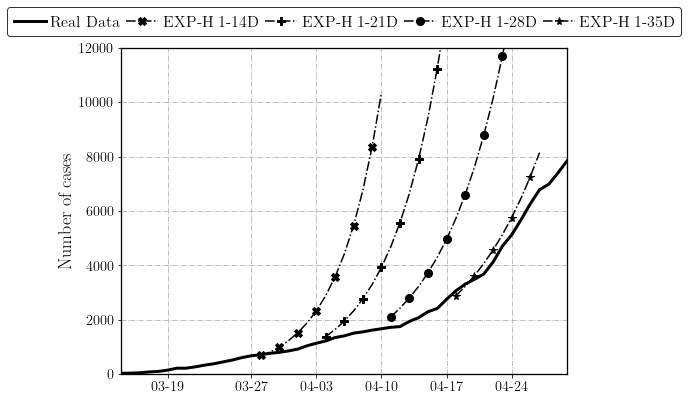

In [102]:
FONTSIZE=18

state = 'CE'
strategy = 'aggregated'
model =  'exponential-holt'

plt.rc('font', family='serif')
plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize='x-large')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)



plot(state, strategy, model, 
     ['yhat_model_1_to_14', 'yhat_model_1_to_21', 'yhat_model_1_to_28', 'yhat_model_1_to_35'], 
     labels=['EXP-H 1-14D', 'EXP-H 1-21D', 'EXP-H 1-28D', 'EXP-H 1-35D'],
     locs = [5, 14, 21, 28, 35, 42, 49])

leg = ax.legend(fontsize=FONTSIZE-2, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, handletextpad=0.3, columnspacing=0.4)
# leg = ax.legend(fontsize=FONTSIZE, bbox_to_anchor=(1, 0.785), loc='center left', ncol=1, handletextpad=0.3, columnspacing=0.4)

leg.get_frame().set_edgecolor('k')


ax.set_ylabel('Number of cases', fontsize=FONTSIZE)
# ax.set_xlabel('Time (days)', fontsize=FONTSIZE)
plt.grid(ls='-.')

for ori in ax.spines:
    ax.spines[ori].set_linewidth(1.3)

plt.ylim(0, 12000)
plt.xlim(0, 48)

plt.savefig(path.join(RESULTS_FOLDER, 'figures', '{}-{}-{}-forecast-allmodels.png'.format(state, strategy, model)), dpi=300, bbox_inches='tight')

# SP

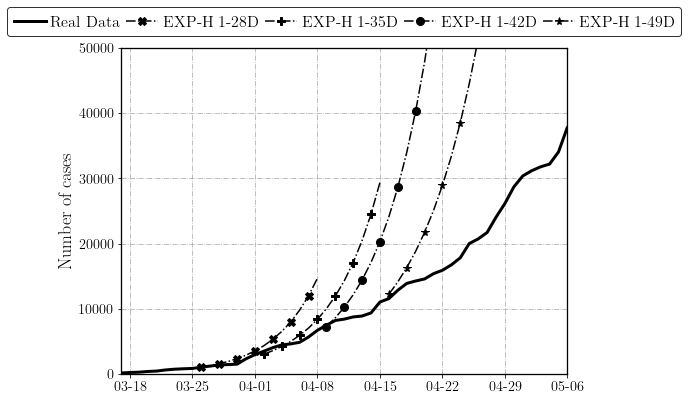

In [110]:
FONTSIZE=18

state = 'SP'
strategy = 'aggregated'
model =  'exponential-holt'

plt.rc('font', family='serif')
plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize='x-large')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)



plot(state, strategy, model, 
     ['yhat_model_1_to_28', 'yhat_model_1_to_35', 'yhat_model_1_to_42', 'yhat_model_1_to_49'], 
     labels=['EXP-H 1-28D', 'EXP-H 1-35D', 'EXP-H 1-42D', 'EXP-H 1-49D'],
     locs = [5, 14, 21, 28, 35, 42, 49, 56, 63, 70])

leg = ax.legend(fontsize=FONTSIZE-2, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, handletextpad=0.3, columnspacing=0.4)
# leg = ax.legend(fontsize=FONTSIZE, bbox_to_anchor=(1, 0.785), loc='center left', ncol=1, handletextpad=0.3, columnspacing=0.4)

leg.get_frame().set_edgecolor('k')


ax.set_ylabel('Number of cases', fontsize=FONTSIZE)
# ax.set_xlabel('Time (days)', fontsize=FONTSIZE)
plt.grid(ls='-.')

for ori in ax.spines:
    ax.spines[ori].set_linewidth(1.3)

plt.ylim(0, 50000)
plt.xlim(20, 70)

plt.savefig(path.join(RESULTS_FOLDER, 'figures', '{}-{}-{}-forecast-allmodels.png'.format(state, strategy, model)), dpi=300, bbox_inches='tight')

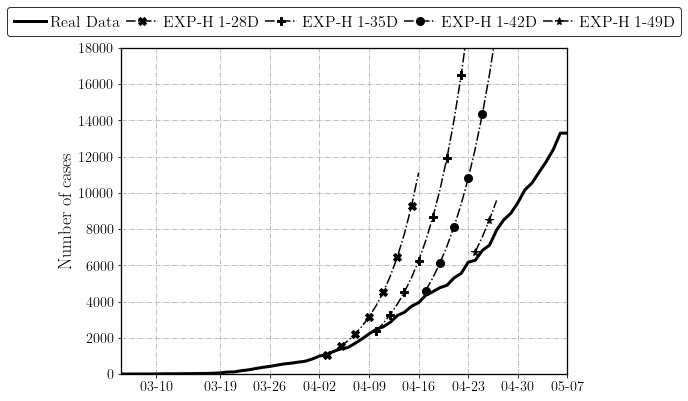

In [109]:
FONTSIZE=18

state = 'RJ'
strategy = 'aggregated'
model =  'exponential-holt'

plt.rc('font', family='serif')
plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize='x-large')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)



plot(state, strategy, model, 
     ['yhat_model_1_to_28', 'yhat_model_1_to_35', 'yhat_model_1_to_42', 'yhat_model_1_to_49'], 
     labels=['EXP-H 1-28D', 'EXP-H 1-35D', 'EXP-H 1-42D', 'EXP-H 1-49D'],
     locs = [5, 14, 21, 28, 35, 42, 49, 56, 63, 70])

leg = ax.legend(fontsize=FONTSIZE-2, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, handletextpad=0.3, columnspacing=0.4)
# leg = ax.legend(fontsize=FONTSIZE, bbox_to_anchor=(1, 0.785), loc='center left', ncol=1, handletextpad=0.3, columnspacing=0.4)

leg.get_frame().set_edgecolor('k')


ax.set_ylabel('Number of cases', fontsize=FONTSIZE)
# ax.set_xlabel('Time (days)', fontsize=FONTSIZE)
plt.grid(ls='-.')

for ori in ax.spines:
    ax.spines[ori].set_linewidth(1.3)


plt.ylim(0, 18000)
plt.xlim(0, 63)
    
plt.savefig(path.join(RESULTS_FOLDER, 'figures', '{}-{}-{}-forecast-allmodels.png'.format(state, strategy, model)), dpi=300, bbox_inches='tight')

# Models Linear

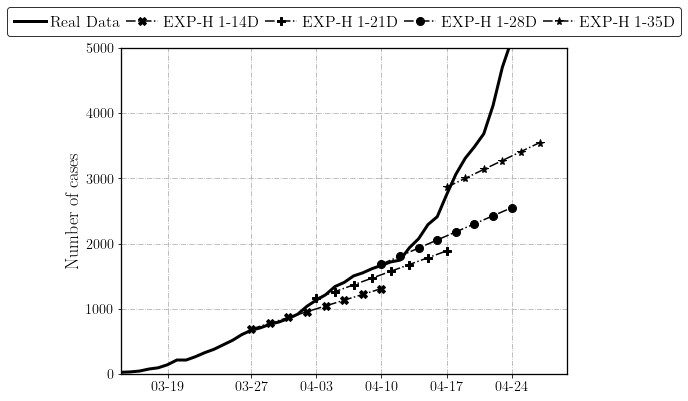

In [112]:
FONTSIZE=18

state = 'CE'
strategy = 'aggregated'
model =  'linear-regression'

plt.rc('font', family='serif')
plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize='x-large')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)



plot(state, strategy, model, 
     ['yhat_model_1_to_14', 'yhat_model_1_to_21', 'yhat_model_1_to_28', 'yhat_model_1_to_35'], 
     labels=['EXP-H 1-14D', 'EXP-H 1-21D', 'EXP-H 1-28D', 'EXP-H 1-35D'],
     locs = [5, 14, 21, 28, 35, 42, 49])

leg = ax.legend(fontsize=FONTSIZE-2, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, handletextpad=0.3, columnspacing=0.4)
# leg = ax.legend(fontsize=FONTSIZE, bbox_to_anchor=(1, 0.785), loc='center left', ncol=1, handletextpad=0.3, columnspacing=0.4)

leg.get_frame().set_edgecolor('k')


ax.set_ylabel('Number of cases', fontsize=FONTSIZE)
# ax.set_xlabel('Time (days)', fontsize=FONTSIZE)
plt.grid(ls='-.')

for ori in ax.spines:
    ax.spines[ori].set_linewidth(1.3)

plt.ylim(0, 5000)
plt.xlim(0, 48)

plt.savefig(path.join(RESULTS_FOLDER, 'figures', '{}-{}-{}-forecast-allmodels.png'.format(state, strategy, model)), dpi=300, bbox_inches='tight')

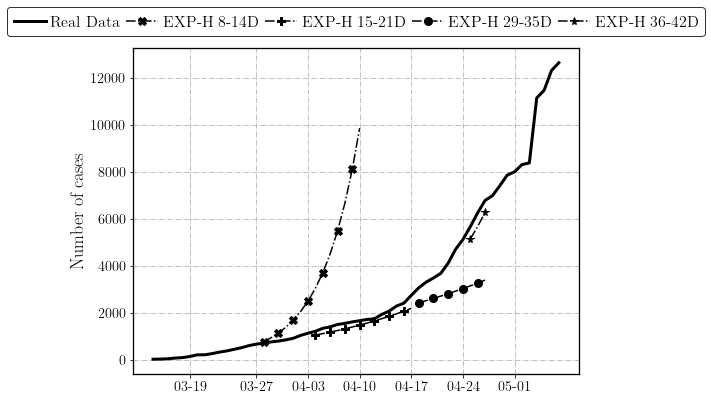

In [144]:
FONTSIZE=18

state = 'CE'
strategy = 'windowed'
model =  'exponential-holt'

plt.rc('font', family='serif')
plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize='x-large')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)



plot(state, strategy, model, 
     ['yhat_model_8_to_14', 'yhat_model_15_to_21', 'yhat_model_29_to_35', 'yhat_model_36_to_42'], 
     labels=['EXP-H 8-14D', 'EXP-H 15-21D', 'EXP-H 29-35D', 'EXP-H 36-42D'],
     locs = [5, 14, 21, 28, 35, 42, 49])

leg = ax.legend(fontsize=FONTSIZE-2, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, handletextpad=0.3, columnspacing=0.4)
# leg = ax.legend(fontsize=FONTSIZE, bbox_to_anchor=(1, 0.785), loc='center left', ncol=1, handletextpad=0.3, columnspacing=0.4)

leg.get_frame().set_edgecolor('k')


ax.set_ylabel('Number of cases', fontsize=FONTSIZE)
# ax.set_xlabel('Time (days)', fontsize=FONTSIZE)
plt.grid(ls='-.')

for ori in ax.spines:
    ax.spines[ori].set_linewidth(1.3)

# plt.ylim(0, 20000)
# plt.xlim(0, 55)

plt.savefig(path.join(RESULTS_FOLDER, 'figures', '{}-{}-{}-forecast-allmodels.png'.format(state, strategy, model)), dpi=300, bbox_inches='tight')

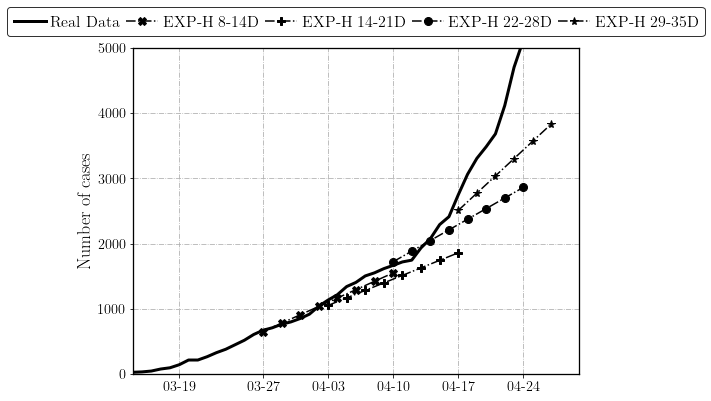

In [145]:
FONTSIZE=18

state = 'CE'
strategy = 'windowed'
model =  'linear-regression'

plt.rc('font', family='serif')
plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize='x-large')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)



plot(state, strategy, model, 
     ['yhat_model_8_to_14', 'yhat_model_15_to_21', 'yhat_model_22_to_28', 'yhat_model_29_to_35'], 
     labels=['EXP-H 8-14D', 'EXP-H 14-21D', 'EXP-H 22-28D', 'EXP-H 29-35D'],
     locs = [5, 14, 21, 28, 35, 42, 49])

leg = ax.legend(fontsize=FONTSIZE-2, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, handletextpad=0.3, columnspacing=0.4)
# leg = ax.legend(fontsize=FONTSIZE, bbox_to_anchor=(1, 0.785), loc='center left', ncol=1, handletextpad=0.3, columnspacing=0.4)

leg.get_frame().set_edgecolor('k')


ax.set_ylabel('Number of cases', fontsize=FONTSIZE)
# ax.set_xlabel('Time (days)', fontsize=FONTSIZE)
plt.grid(ls='-.')

for ori in ax.spines:
    ax.spines[ori].set_linewidth(1.3)

plt.ylim(0, 5000)
plt.xlim(0, 48)

plt.savefig(path.join(RESULTS_FOLDER, 'figures', '{}-{}-{}-forecast-allmodels.png'.format(state, strategy, model)), dpi=300, bbox_inches='tight')